In [1]:
# Import Liabraries
import numpy as np # Linear Algebra Matrices 
import pandas as pd # Dataframe Creation Manipulation
import matplotlib.pyplot as plt # Plotting

In [2]:
# Import the Data
dataset = pd.read_csv('winequality-red.csv')
dataset['intercept'] = 1 # Add One's to the Dataframe

# Features or specific headings that we will be using
X_features = ['intercept', 'residual sugar']
y_features = ['alcohol']

In [3]:
# For Polynomial Fitting
degree = 1
for i in range(2,degree+1):
    dataset[X_features[1] + '^'+str(i)] = dataset[X_features[1]]**degree
#Here we are squaring the the X features to  fit the polynomial instead of a straight line

In [4]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,intercept
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


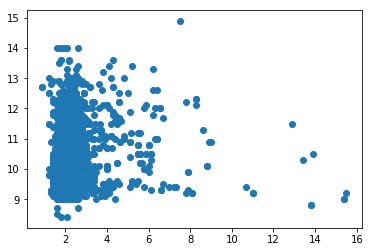

In [5]:
plt.scatter(dataset[X_features[1]],dataset[y_features[0]])
plt.show()

In [6]:
X = dataset[X_features]
y = dataset[y_features]

In [7]:
X = np.array(X)
y = np.array(y).reshape(len(y),1)

# Feature Scaling
# X[:,1] = (X[:,1] - np.mean(X[:,1])) / (max(X[:,1])-min(X[:,1]))
# y = (y-np.mean(y))/(max(y)-min(y))

print('Predictor: ', X)
print('Predictions: ', y)


Predictor:  [[ 1.   1.9]
 [ 1.   2.6]
 [ 1.   2.3]
 ..., 
 [ 1.   2.3]
 [ 1.   2. ]
 [ 1.   3.6]]
Predictions:  [[  9.4]
 [  9.8]
 [  9.8]
 ..., 
 [ 11. ]
 [ 10.2]
 [ 11. ]]


In [8]:
# Intitial Random Weight
weights = np.random.rand(X.shape[1],1) # [w0, w1] -> w0 = c intercept, w1 = m -> slope
print(weights)

[[ 0.65397139]
 [ 0.1843575 ]]


In [9]:
print(X.shape)
print(weights.shape)
print(y.shape)

(1599, 2)
(2, 1)
(1599, 1)


In [10]:
# Cost Function
def costFunc(X, y, weights):
    h = np.dot(X,weights)
    J = 0.5*sum( np.subtract(h,y)**2 )/len(y)
    return J
#here cost function is (1/2(sigma((mx+c) - y)^2))/ number of labels y 

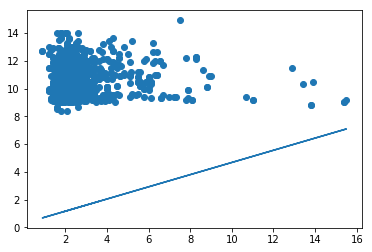

Initial Cost:  [ 41.41053127]


In [19]:
plt.scatter(X[:,1],y)
random_weight = np.random.rand(X.shape[1],1)
plt.plot(X[:,1],np.dot(X,random_weight))
plt.show()
print('Initial Cost: ', costFunc(X,y,random_weight))

In [12]:
def gradientDecent(X,y,initial_weights,learning_rate, number_of_iterations):
    dJ = np.zeros([X.shape[1], 1])
    for i in range(0,number_of_iterations):
        h = np.dot(X,initial_weights)
        for j in range(0,len(dJ)-1):
            dJ[j] = sum(np.subtract(h,y)*X[:,j].reshape(len(X),1))
        initial_weights = np.subtract(initial_weights, (learning_rate/len(y))*dJ)
        print('Cost at iteration ', i+1, 'is: ', costFunc(X,y,initial_weights))
        print('Weights:', initial_weights)

    return initial_weights

In [13]:
def train(learning_rate, max_iter):
    new_weights = gradientDecent(X,y,weights,learning_rate,max_iter)
    plt.scatter(X[:,1],y)
    plt.plot(X[:,1],np.dot(X,new_weights))
    plt.show()
    print('Cost: ', costFunc(X,y,new_weights))
    return new_weights

def predict(X, new_weights):
    X = np.concatenate((np.ones([len(X),1]), X), axis=1)
    predictions = np.dot(X,new_weights)
    return predictions

Cost at iteration  1 is:  [ 35.62529325]
Weights: [[ 1.58406778]
 [ 0.1843575 ]]
Cost at iteration  2 is:  [ 28.96850809]
Weights: [[ 2.42115453]
 [ 0.1843575 ]]
Cost at iteration  3 is:  [ 23.57651211]
Weights: [[ 3.1745326]
 [ 0.1843575]]
Cost at iteration  4 is:  [ 19.20899536]
Weights: [[ 3.85257287]
 [ 0.1843575 ]]
Cost at iteration  5 is:  [ 15.6713068]
Weights: [[ 4.46280911]
 [ 0.1843575 ]]
Cost at iteration  6 is:  [ 12.80577906]
Weights: [[ 5.01202173]
 [ 0.1843575 ]]
Cost at iteration  7 is:  [ 10.4847016]
Weights: [[ 5.50631308]
 [ 0.1843575 ]]
Cost at iteration  8 is:  [ 8.60462885]
Weights: [[ 5.9511753]
 [ 0.1843575]]
Cost at iteration  9 is:  [ 7.08176992]
Weights: [[ 6.3515513]
 [ 0.1843575]]
Cost at iteration  10 is:  [ 5.84825419]
Weights: [[ 6.7118897]
 [ 0.1843575]]
Cost at iteration  11 is:  [ 4.84910645]
Weights: [[ 7.03619426]
 [ 0.1843575 ]]
Cost at iteration  12 is:  [ 4.03979678]
Weights: [[ 7.32806836]
 [ 0.1843575 ]]
Cost at iteration  13 is:  [ 3.38425595]

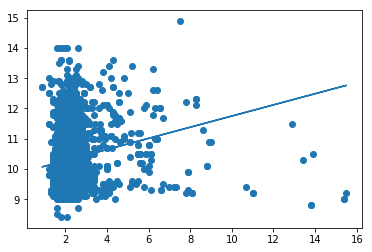

Cost:  [ 0.59073076]


In [20]:
w = train(0.1, 50)

In [21]:
test_vals = np.array(X[:,1:])
predict(test_vals, w)

array([[ 10.25727945],
       [ 10.3863297 ],
       [ 10.33102245],
       ..., 
       [ 10.33102245],
       [ 10.2757152 ],
       [ 10.5706872 ]])

In [16]:
X.shape

(1599, 2)